In [57]:
from __future__ import division

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.utils import to_categorical # this is for changing label to categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import keras as kr
from scipy.io import loadmat
from sklearn.utils import shuffle

In [72]:
df = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

In [49]:
# Load data

data = df.values.astype(np.float32)
np.random.shuffle(data)
X = data[:, 1:]
Y = data[:, 0]

Xtrain = X[:-1000]
Ytrain = Y[:-1000]
Xtest  = X[-1000:]
Ytest  = Y[-1000:]

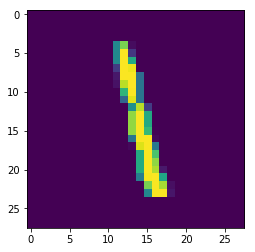

In [13]:
s = np.reshape(Xtrain[0], (28, 28))
plt.imshow(s)
plt.show()

In [50]:
Xtrain = Xtrain.astype('float32')/255
Xtest = Xtest.astype('float32')/255

In [51]:
Ytrain_ind = to_categorical(Ytrain, num_classes=10)
Ytest_ind = to_categorical(Ytest, num_classes=10)

In [52]:
Xtrain = Xtrain.reshape(-1, 28, 28, 1)
Xtest = Xtest.reshape(-1,28,28,1)

In [73]:
test = df_test.values.astype(np.float32)
test = test.astype('float32')/255
test = test.reshape(-1, 28, 28,1)

In [53]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last',
                 input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid' ))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding='same', activation='relu', data_format='channels_last'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), padding='valid', strides=2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [54]:
optimizer = kr.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [58]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

In [59]:
reduce_lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [60]:
datagen.fit(Xtrain)

In [61]:
batch_size = 64
epochs = 20

In [62]:
generator = datagen.flow(Xtrain, Ytrain_ind, batch_size = batch_size)

In [63]:
val_data = (Xtest, Ytest_ind)

In [66]:
history = model.fit_generator(generator, epochs = epochs, validation_data = val_data, verbose=2,
                              steps_per_epoch = Xtrain.shape[0]//batch_size, callbacks = [reduce_lr])

Epoch 1/20
 - 482s - loss: 0.2148 - acc: 0.9391 - val_loss: 0.0554 - val_acc: 0.9830
Epoch 2/20
 - 494s - loss: 0.1065 - acc: 0.9682 - val_loss: 0.0478 - val_acc: 0.9850
Epoch 3/20
 - 487s - loss: 0.0802 - acc: 0.9762 - val_loss: 0.0443 - val_acc: 0.9850
Epoch 4/20
 - 493s - loss: 0.0729 - acc: 0.9780 - val_loss: 0.0397 - val_acc: 0.9890
Epoch 5/20
 - 450s - loss: 0.0622 - acc: 0.9813 - val_loss: 0.0333 - val_acc: 0.9920
Epoch 6/20
 - 438s - loss: 0.0509 - acc: 0.9849 - val_loss: 0.0309 - val_acc: 0.9920
Epoch 7/20
 - 442s - loss: 0.0495 - acc: 0.9857 - val_loss: 0.0269 - val_acc: 0.9940
Epoch 8/20
 - 438s - loss: 0.0427 - acc: 0.9872 - val_loss: 0.0384 - val_acc: 0.9870
Epoch 9/20
 - 437s - loss: 0.0405 - acc: 0.9877 - val_loss: 0.0271 - val_acc: 0.9920
Epoch 10/20
 - 437s - loss: 0.0379 - acc: 0.9888 - val_loss: 0.0250 - val_acc: 0.9920
Epoch 11/20
 - 438s - loss: 0.0338 - acc: 0.9896 - val_loss: 0.0254 - val_acc: 0.9940
Epoch 12/20
 - 438s - loss: 0.0309 - acc: 0.9900 - val_loss: 0.

In [67]:
model.evaluate(Xtest, Ytest_ind)

1000/1000 [==============================] - 5s 5ms/step


[0.018469376169508906, 0.994]

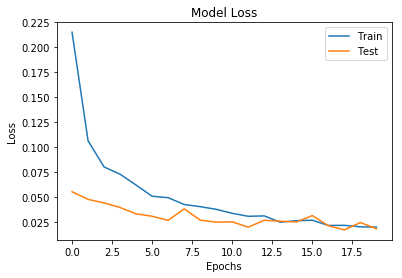

In [68]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

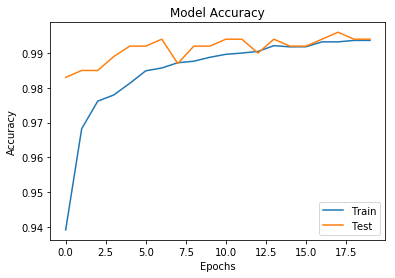

In [69]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'])
plt.show()

In [74]:
pred_digits_test=np.argmax(model.predict(test),axis=1)
image_id_test=[]
for i in range (len(pred_digits_test)):
    image_id_test.append(i+1)
d={'ImageId':image_id_test,'Label':pred_digits_test}
answer=pd.DataFrame(d)
answer.to_csv('answer.csv',index=False)

In [86]:
data_test = df_test.values.astype(np.float32)

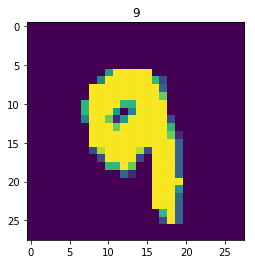

In [95]:
s = np.reshape(data_test[472], (28, 28))
plt.imshow(s)
plt.title(pred_digits_test[472])
plt.show()